In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from tqdm import tqdm

from lib.diffeq import crank_nicolson_solve

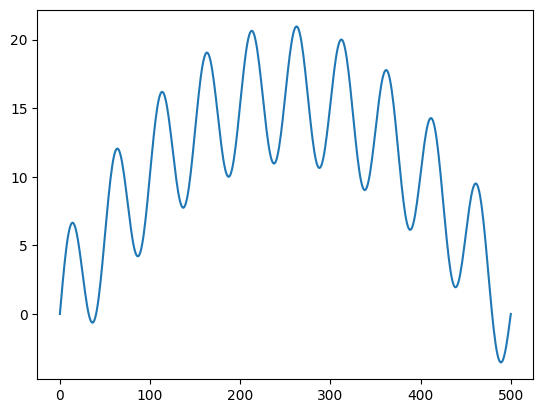

In [2]:
L = 8
T = 1
Nl = 500
Nt = 500

x = np.linspace(-L/2, L/2, Nl + 1)
time = np.linspace(0, T, Nt + 1)
# u0 = (np.sin(math.pi * x / L)**2)*100
# u0 = (L/2)**2 - x**2  # one
u0 = (L/2)**2 - x**2 + 5*np.sin(20*math.pi*x/L)  # two


# u0 = np.zeros(Nl + 1)
# u0[int(Nl/2)] = 3000

plt.plot(u0)

alpha = 7.812500000000001


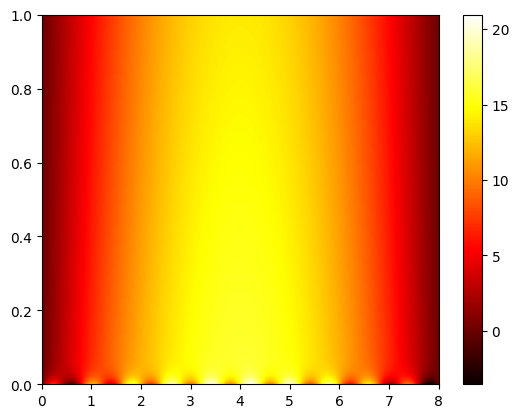

In [3]:
u = crank_nicolson_solve(u0, L, T, Nl, Nt, eta=1)
# print(f"Chosen {alpha = }")

plt.imshow(u, aspect='auto', extent=[0, L, 0, T], cmap='hot', origin='lower')
plt.colorbar()

In [15]:
def make_gif(u, name, skip_frame = 1, till=None, fps=25):
    u = u[:till:skip_frame] if till is not None else u[::skip_frame]
    max_B = np.max(u)

    p = tqdm(total=u.shape[0]+1)

    fig, ax = plt.subplots()
    def update(frame):
        p.update(1)
        ax.clear()
        # a thin gray half-transparent line
        ax.plot(x, u0, "r--", label="Initial Condition", alpha=0.2)
        ax.plot(x, u[frame], label=f'Time Step {frame*skip_frame}')
        plt.ylim(0, max_B)
        ax.set_title('Magnetic Field Strength vs z Distance')
        ax.set_xlabel('Distance')
        ax.set_ylabel('B')
        ax.legend(loc='upper right')
        ax.grid()

    animation = FuncAnimation(fig, update, frames=u.shape[0], interval=int(1000/fps), repeat=False)
    animation.save(name, writer='imagemagick')
    p.close()

100%|██████████| 201/201 [00:35<00:00,  5.61it/s]


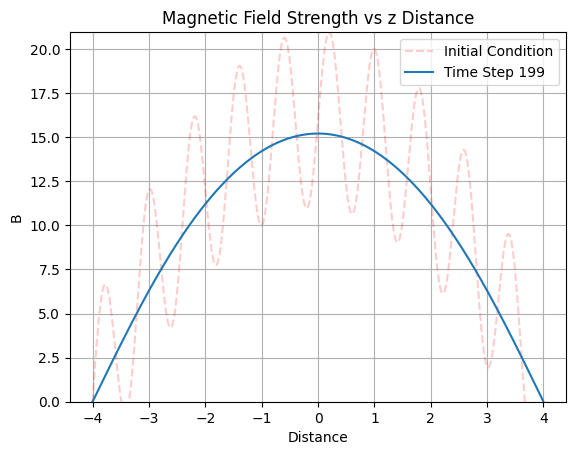

In [17]:
make_gif(u, "crank_nicolson.gif", skip_frame=1, till=200, fps=25)

![animation.gif](crank_nicolson.gif)